In [ ]:
pip install -q -U google-generativeai

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
from google.colab import userdata


In [ ]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [ ]:
!curl -o image.jpg https://media-cdn.tripadvisor.com/media/photo-s/0e/34/29/0c/dinner-bill-for-3pax.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32793  100 32793    0     0   170k      0 --:--:-- --:--:-- --:--:--  170k


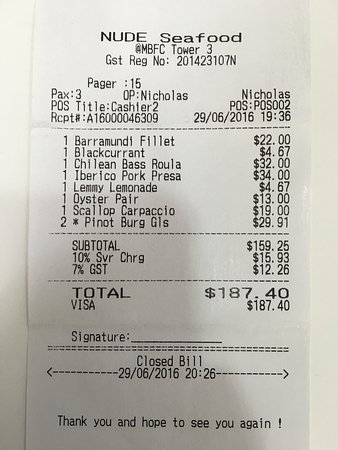

In [ ]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

In [ ]:
# !pip install -U --quiet langchain-google-genai  langchain


In [ ]:
# from langchain_google_genai.chat_models import ChatGoogleGenerativeAI

model = genai.GenerativeModel('gemini-pro-vision')
# model = ChatGoogleGenerativeAI(model='gemini-pro-vision')

In [ ]:
prompt = '''Convert Invoice data into json format with appropriate json tags as required for the data in image'''
model_behavior = """
    You are a specialist in comprehending receipts.
    Input images in the form of receipts will be provided to you,
    and your task is to respond to questions based on the content of the input image.
    """

In [ ]:
response = model.generate_content([model_behavior,prompt,img])
print (response.text)

 ```json
{
  "NUDE Seafood": {
    "GST Reg No": "201423107N",
    "Page": "3",
    "Pax": "3",
    "Pos": "002",
    "Table": "50",
    "Receipt": "A16000046309",
    "Date": "29/06/2016",
    "Time": "19:36",
    "Cashier": "Nicholas",
    "Items": [
      {
        "Name": "Barramundi Filet",
        "Quantity": "1",
        "Price": "22.00"
      },
      {
        "Name": "Blackcurrant",
        "Quantity": "1",
        "Price": "4.67"
      },
      {
        "Name": "Chilean Bass Roula",
        "Quantity": "1",
        "Price": "32.00"
      },
      {
        "Name": "Iberico Pork Presa",
        "Quantity": "1",
        "Price": "34.00"
      },
      {
        "Name": "Lemmy Lemonade",
        "Quantity": "1",
        "Price": "13.00"
      },
      {
        "Name": "Oyster Pair",
        "Quantity": "1",
        "Price": "13.00"
      },
      {
        "Name": "Scallop Carpaccio",
        "Quantity": "1",
        "Price": "19.00"
      },
      {
        "Name": "Pinot Bu